The goal of the model is to predict if the client will subscribe a term deposit (variable y).

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on Data Distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Trying multiple classification algorithms
* Selecting the best Model

# Reading the data into python

In [86]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [87]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [88]:
BankData=pd.read_csv("R:\\DS\\Ivy\\ML\\bank.csv",encoding='latin')
print('Shape before deleting duplicate values:', BankData.shape)

# Removing duplicate rows if any
BankData.drop_duplicates(inplace=True)
print('Shape after deleting duplicate values:', BankData.shape)

Shape before deleting duplicate values: (4521, 17)
Shape after deleting duplicate values: (4521, 17)


*The data contains no duplicate values*

# Data Description
Input variables:
   # bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
 
 10 - day: last contact day of the month (numeric)
 
 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 
 12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
 
 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 
 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 
 15 - previous: number of contacts performed before this campaign and for this client (numeric)
 
 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  **Output variable (desired target):**
 
 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. 
There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : It helps to see the first few sample rows of the data
* <b>info() </b>: It provides the summarized information of the data
* <b>describe() </b>: It provides the descriptive statistical details of the data
* <b>nunique()</b>: It helps us to identify if a column is categorical or continuous

In [89]:
BankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [90]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


In [91]:
BankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable

* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, there should be a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<AxesSubplot:xlabel='y', ylabel='count'>

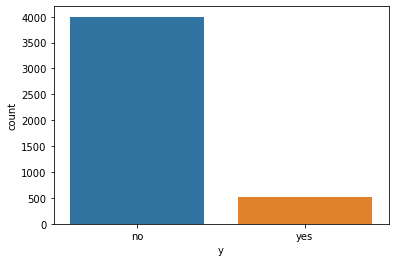

In [92]:
sns.countplot(BankData['y'])

Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
This step helps to start the column rejection process. 

In [93]:
# Finding unique values for each column to understand which column is categorical and which one is Continuous
BankData.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

# Basic Data Exploration Results

* **age:** continuous
* **job:** categorical
* **marital:** categorical
* **default:** categorical
* **balance:** qualitative. rejected
* **housing:** categorical
* **loan:** categorical
* **contact:** categorical
* **day:** continuous. rejected
* **month:** categorical.rejected
* **duration:** continuous
* **campaign:** continuous
* **pdays:** continuous
* **previous:** continuous
* **poutcome:** categorical
* **y:** categorical. **Target Variable!**

# Removing useless columns from the data

In [94]:
BankData.drop(['balance','day','month'],axis=1,inplace=True)
BankData.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,226,1,-1,0,unknown,no


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

In [95]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotCharts(InpData, CatCols):
    fig,subplot=plt.subplots(nrows=1,ncols=len(CatCols),figsize=(30,10))
    
    for pred,PlotNum in zip(CatCols,range(len(CatCols))):
        InpData.groupby(pred).size().plot(kind='bar',ax=subplot[PlotNum])

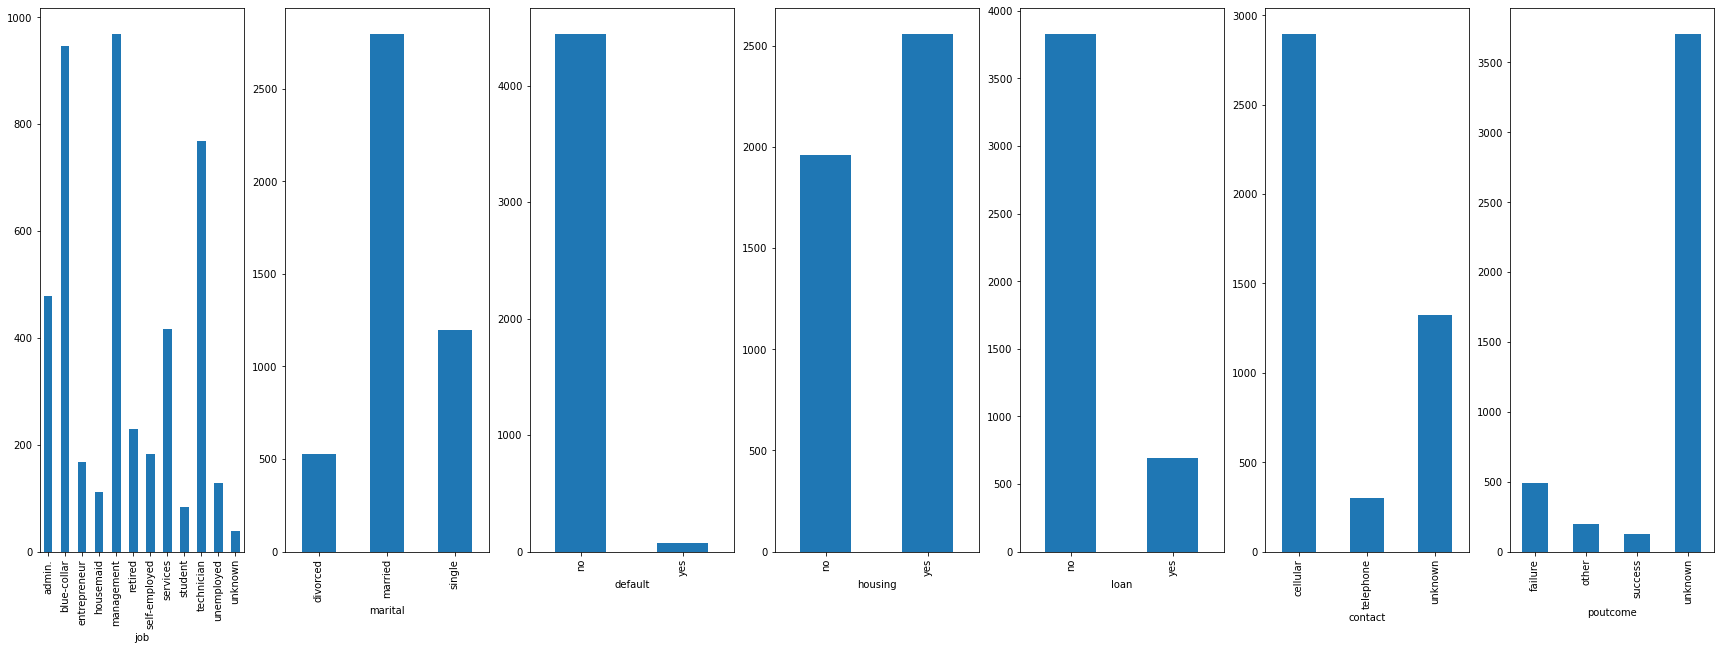

In [96]:
CatCols=['job','marital','default','housing','loan','contact','poutcome']
PlotCharts(InpData=BankData, CatCols=CatCols)

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.
The Categorical Variable 'default' has no significant variation, hence it cannot be used further in the model.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

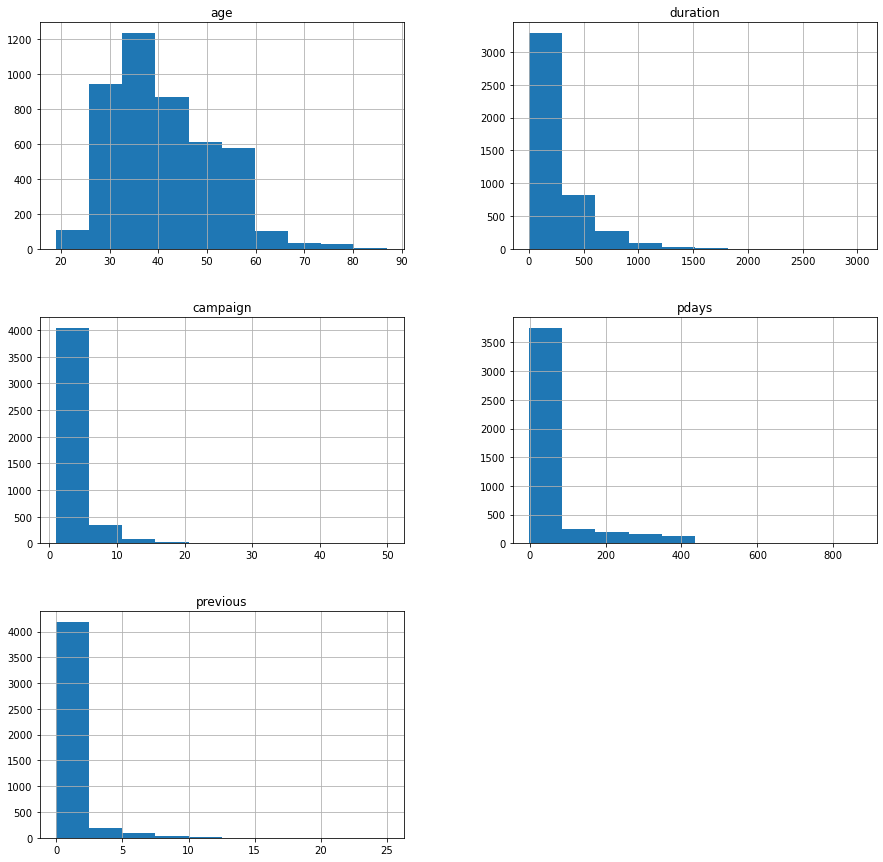

In [97]:
BankData.hist(['age','duration','campaign','pdays','previous','poutcome'],figsize=(15,15))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then reject the column.

# Outlier treatment
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

**Outlier in 'duration'**

In [98]:
len(BankData[BankData['duration']>=1500])

25

In [99]:
BankData['duration'][BankData['duration']<=1500].sort_values(ascending=False)

298     1484
4495    1476
4209    1473
1899    1473
2653    1472
        ... 
3566       5
2218       5
2280       5
2892       5
1116       4
Name: duration, Length: 4496, dtype: int64

In [100]:
BankData['duration'][BankData['duration']>=1500]=1400

**Outlier in 'campaign'**

In [101]:
len(BankData[BankData['campaign']>=20])

26

In [102]:
BankData['campaign'][BankData['campaign']<20].sort_values(ascending=False)

3353    19
2001    19
4192    19
3233    18
3030    18
        ..
2199     1
2201     1
2203     1
2208     1
2258     1
Name: campaign, Length: 4495, dtype: int64

In [103]:
BankData['campaign'][BankData['campaign']>20]=15

**Outlier in 'pdays'**

In [104]:
len(BankData[BankData['pdays']>=400])

26

In [105]:
BankData['pdays'][BankData['pdays']<400].sort_values(ascending=False)

2968    397
2776    388
2055    386
3331    385
596     382
       ... 
1672     -1
1673     -1
1674     -1
1675     -1
2257     -1
Name: pdays, Length: 4495, dtype: int64

In [106]:
BankData['pdays'][BankData['pdays']>=400]=380

**Outlier in 'previous'**

In [107]:
len(BankData[BankData['previous']>=15])

9

In [108]:
BankData['previous'][BankData['previous']<15].sort_values(ascending=False)

2176    14
4159    14
1548    13
1471    12
1524    12
        ..
1673     0
1674     0
1675     0
1677     0
2259     0
Name: previous, Length: 4512, dtype: int64

In [109]:
BankData['previous'][BankData['previous']>15]=10

# Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

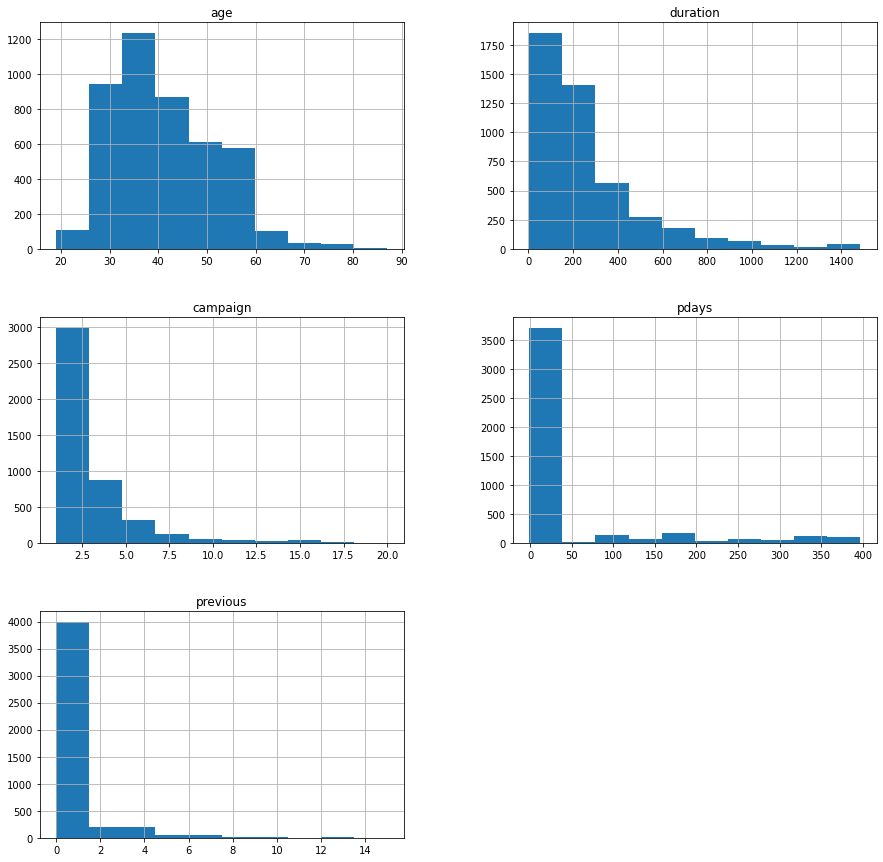

In [110]:
BankData.hist(['age','duration','campaign','pdays','previous'],figsize=(15,15))

# Feature Selection
## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots

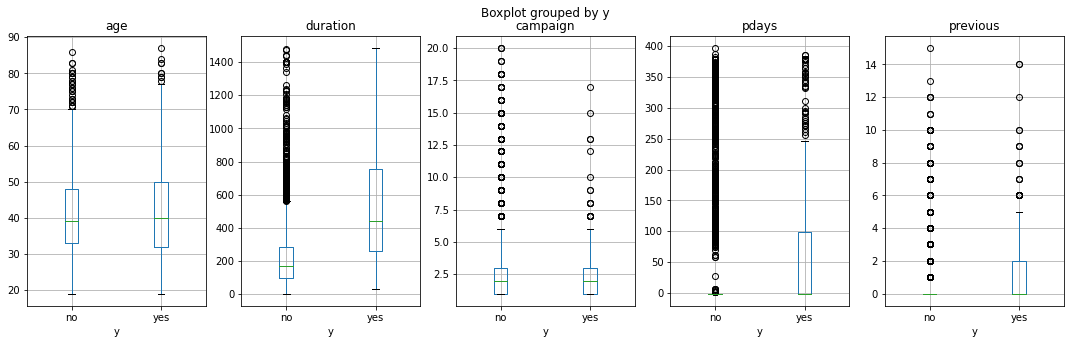

In [111]:
ContCols=['age','duration','campaign','pdays','previous']

fig,subplot=plt.subplots(nrows=1, ncols=len(ContCols), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for pred,PlotNum in zip(ContCols, range(len(ContCols))):
    BankData.boxplot(column=pred, by='y', figsize=(5,5), vert=True, ax=subplot[PlotNum])

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [112]:
from scipy.stats import f_oneway

In [113]:
# Defining a function to find the statistical relationship with all the categorical variables
def FuncAnova(InpData,TargetVariable,ContCols):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    for pred in ContCols:
        ContColsList=InpData.groupby(TargetVariable)[pred].apply(list)
        anova=f_oneway(*ContColsList)
        
         # If the ANOVA P-Value is <0.05, that means we reject H0
        if(anova[1]<0.05):
            print(pred,'is correlated with',TargetVariable,'| P-Value:',anova[1])
            SelectedPredictors.append(pred)
        else:
            print(pred,'is not correlated with',TargetVariable,'| P-Value:',anova[1])
    return(SelectedPredictors)

In [114]:
# Calling the function to check which categorical variables are correlated with target
FuncAnova(InpData=BankData, TargetVariable='y',ContCols=ContCols)

age is correlated with y | P-Value: 0.0024245358173772096
duration is correlated with y | P-Value: 1.0974838799391896e-181
campaign is correlated with y | P-Value: 1.1252823006294666e-05
pdays is correlated with y | P-Value: 2.6423704446362466e-11
previous is correlated with y | P-Value: 4.7051609750313654e-20


['age', 'duration', 'campaign', 'pdays', 'previous']

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

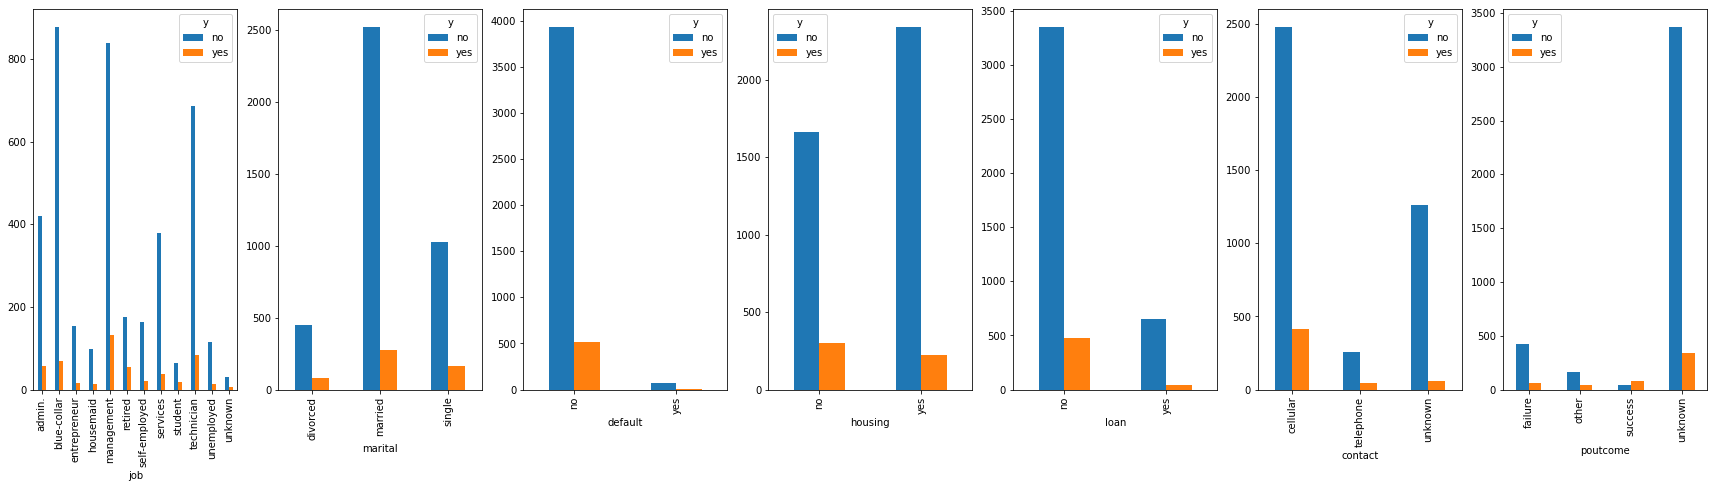

In [115]:
fig,subplot=plt.subplots(ncols=len(CatCols),nrows=1,figsize=(30,7))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "y"
for pred,PlotNum in zip(CatCols,range(len(CatCols))):
    CrossTab=pd.crosstab(columns=BankData['y'],index=BankData[pred])
    CrossTab.plot.bar(ax=subplot[PlotNum])

# Grouped Bar charts Interpretation
These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 

If the ratio of bars is similar across all categories, then the two columns are not correlated. 

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [116]:
from scipy.stats import chi2_contingency

In [117]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def ChiFunc(InpData,TargetVariable,CatCols):
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    for pred in CatCols:
        CrossTab=pd.crosstab(index=BankData[pred],columns=BankData[TargetVariable])
        ChiSq=chi2_contingency(CrossTab)
        
     # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSq[1] < 0.05):
            print(pred, 'is correlated with', TargetVariable, '| P-Value:', ChiSq[1])
            SelectedPredictors.append(pred)
        else:
            print(pred, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSq[1])        
            
    return(SelectedPredictors)

In [118]:
ChiFunc(InpData=BankData,TargetVariable='y',CatCols=CatCols)

job is correlated with y | P-Value: 1.901391096662705e-10
marital is correlated with y | P-Value: 7.373535401823763e-05
default is NOT correlated with y | P-Value: 1.0
housing is correlated with y | P-Value: 2.7146998959323014e-12
loan is correlated with y | P-Value: 2.9148288298428256e-06
contact is correlated with y | P-Value: 8.30430129641147e-20
poutcome is correlated with y | P-Value: 1.5398831095860172e-83


['job', 'marital', 'housing', 'loan', 'contact', 'poutcome']

# Selecting final predictors for Machine Learning

In [119]:
SelectedCols=['age', 'duration', 'campaign', 'pdays', 'previous','job', 'marital', 'housing', 'loan', 'contact', 'poutcome']
DataForML=BankData[SelectedCols]
DataForML.head()

,age,duration,campaign,pdays,previous,job,marital,housing,loan,contact,poutcome
0,30,79,1,-1,0,unemployed,married,no,no,cellular,unknown
1,33,220,1,339,4,services,married,yes,yes,cellular,failure
2,35,185,1,330,1,management,single,yes,no,cellular,failure
3,30,199,4,-1,0,management,married,yes,yes,unknown,unknown
4,59,226,1,-1,0,blue-collar,married,yes,no,unknown,unknown


## Data Pre-processing for Machine Learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()

In this data there is no Ordinal categorical variable.

## Converting the binary nominal variable to numeric using 1/0 mapping

In [120]:
DataForML['housing'].replace({'yes':1,'no':0},inplace=True)
DataForML['loan'].replace({'yes':1,'no':0},inplace=True)
DataForML.head()

,age,duration,campaign,pdays,previous,job,marital,housing,loan,contact,poutcome
0,30,79,1,-1,0,unemployed,married,0,0,cellular,unknown
1,33,220,1,339,4,services,married,1,1,cellular,failure
2,35,185,1,330,1,management,single,1,0,cellular,failure
3,30,199,4,-1,0,management,married,1,1,unknown,unknown
4,59,226,1,-1,0,blue-collar,married,1,0,unknown,unknown


## Converting the nominal variable to numeric using get_dummies()

In [121]:
FinalData=pd.get_dummies(DataForML)
FinalData.head()

,age,duration,campaign,pdays,previous,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,79,1,-1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,220,1,339,4,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,35,185,1,330,1,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,30,199,4,-1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,59,226,1,-1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [122]:
# Adding Target Variable to the data
FinalData['y']=BankData['y']

#Converting target variable to 1/0
FinalData['y'].replace({'yes':1,'no':0},inplace=True)
FinalData.head()

,age,duration,campaign,pdays,previous,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,...,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,30,79,1,-1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,33,220,1,339,4,1,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,35,185,1,330,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
3,30,199,4,-1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,59,226,1,-1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [123]:
FinalData.reset_index(drop=True, inplace=True)

# Machine Learning: Splitting the data into Training and Testing sample
We do not use the full data for creating a model. Some data is randomly selected and kept aside for checking how good the model is performing. This is known as **Testing Data** and the remaining data is called **Training data** on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [124]:
FinalData.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'housing', 'loan',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y'],
      dtype='object')

In [125]:
Preds=['age', 'duration', 'campaign', 'pdays', 'previous', 'housing', 'loan',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']

x=FinalData[Preds].values
y=FinalData['y'].values

In [126]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=5,penalty='l2',solver='saga')

# Creating the model on Training Data
lm=clf.fit(x_train,y_train)
pred=lm.predict(x_test)

In [128]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(pred,y_test))
print('###Confusion Matrix### \n',metrics.confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1303
           1       0.16      0.50      0.24        54

    accuracy                           0.87      1357
   macro avg       0.57      0.69      0.58      1357
weighted avg       0.94      0.87      0.90      1357

###Confusion Matrix### 
 [[1157  146]
 [  27   27]]


In [129]:
# Printing the Overall Accuracy of the model
print('accuracy on test data:',round(metrics.f1_score(pred,y_test,average='weighted'),2))

accuracy on test data: 0.9


In [130]:
from sklearn.model_selection import cross_val_score

# Passing full data X and y because the K-fold will split the data and automatically choose train/test
print('avg accuracy of model',round(cross_val_score(lm,x,y,cv=10,scoring='f1_weighted').mean(),2))

avg accuracy of model 0.86


# Decision Trees

In [131]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Creating the model on Training Data
DT=clf.fit(x_train,y_train)
pred=DT.predict(x_test)

In [132]:
# Measuring accuracy on Testing Data
print(metrics.classification_report(pred,y_test))
print('###Confusion matrix### \n',metrics.confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1304
           1       0.18      0.58      0.27        53

    accuracy                           0.88      1357
   macro avg       0.58      0.74      0.60      1357
weighted avg       0.95      0.88      0.91      1357

###Confusion matrix### 
 [[1162  142]
 [  22   31]]


<AxesSubplot:>

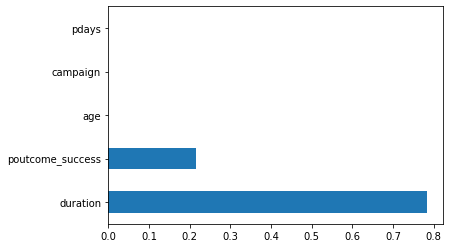

In [133]:
# Plotting the feature importance for Top 5 most important columns
pd.Series(DT.feature_importances_,index=Preds).nlargest(5).plot(kind='barh')

In [134]:
# Printing the Overall Accuracy of the model
print('accuracy on test data:', round(metrics.f1_score(pred,y_test, average='weighted'),2))
print('avg accuracy of model:',round(cross_val_score(DT,x,y,cv=10,scoring='f1_weighted').mean(),2))

accuracy on test data: 0.91
avg accuracy of model: 0.88


### Plotting a Decision Tree

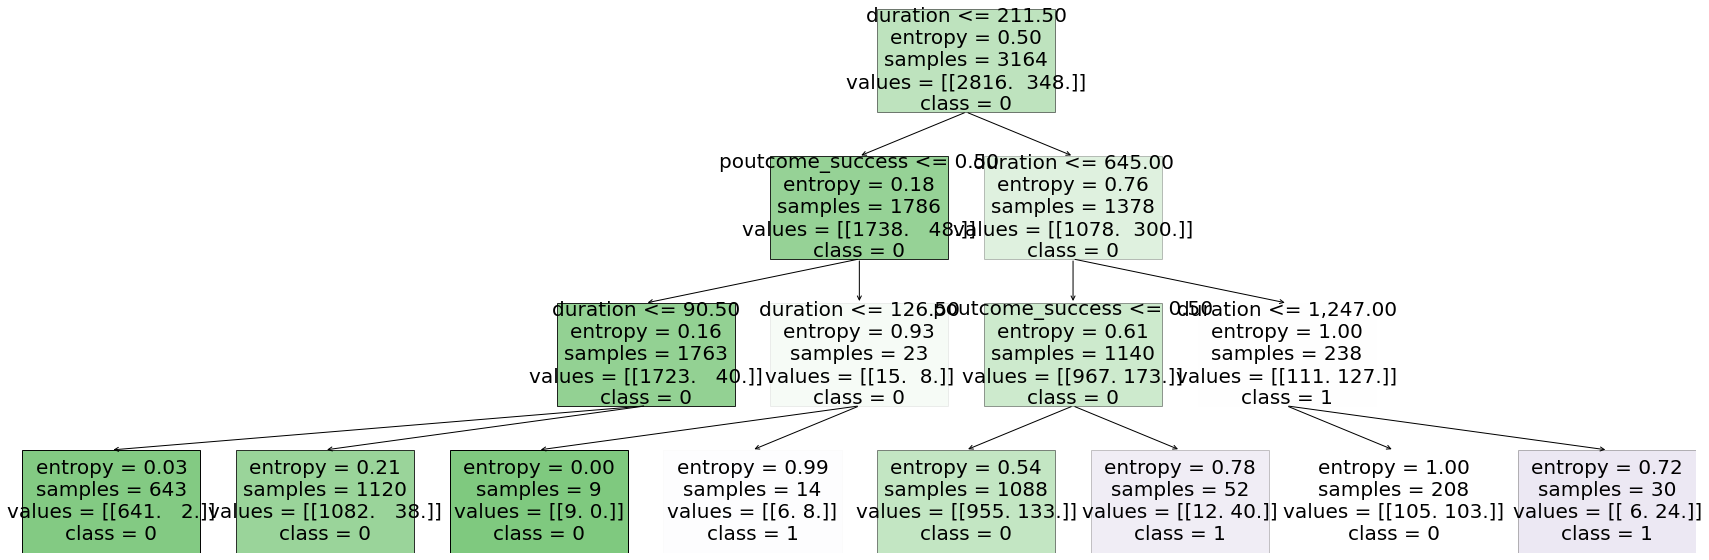

In [135]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
dtree = dtreeplt(model=clf, feature_names=Preds, target_names=['0','1'])
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)